加载数据中...
f训练集样本数 {len(x_train)}, 测试集样本数 {len(x_test)}


D:\Apply\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

开始训练...
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.6913 - loss: 0.5555 - val_accuracy: 0.8322 - val_loss: 0.4195
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8979 - loss: 0.2628 - val_accuracy: 0.8554 - val_loss: 0.3274
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9297 - loss: 0.1921 - val_accuracy: 0.8582 - val_loss: 0.3478
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9529 - loss: 0.1373 - val_accuracy: 0.8528 - val_loss: 0.4094
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9634 - loss: 0.1102 - val_accuracy: 0.8670 - val_loss: 0.4037
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9700 - loss: 0.0904 - val_accuracy: 0.8612 - val_loss: 0.4432
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9776 - loss: 0.0688 - val_accuracy: 0.8588 - val_loss: 0.4387
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9823 - loss: 0

NameError: name 'training_curve' is not defined

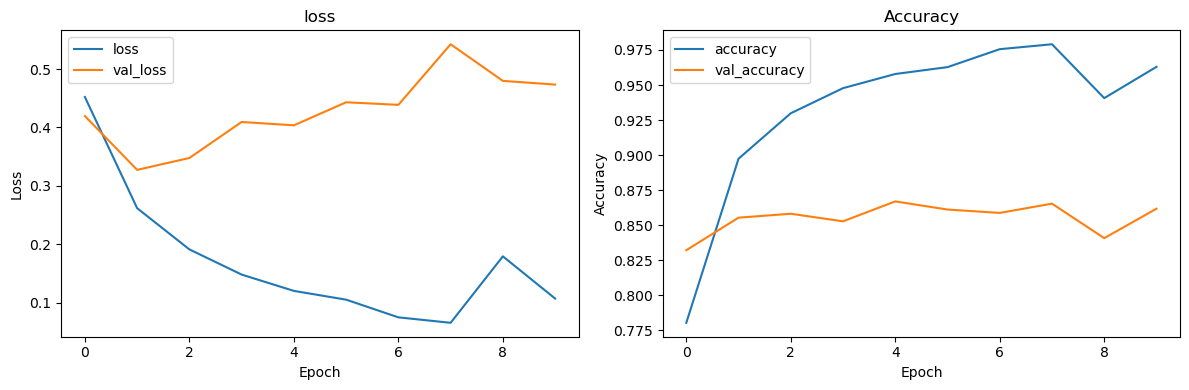

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

# 参数设置
max_words = 10000     # 只考虑训练集中出现频率最高的10000个词汇，忽略其他词汇
maxlen = 200          # 每条影评文本序列统一长度为200，超过则截断，不足则填充
embedding_dim = 32    # 词向量的维度，将每个单词编码成32维的稠密向量
batch_size = 64       # 每次训练用64条样本进行梯度更新
epochs = 10           # 训练10轮（完整遍历训练集10次）

# 加载IMDB数据集
print("加载数据中...")
# 载入预处理好的IMDB影评数据，限制词汇表大小为10000
# x_train和x_test是由整数索引组成的序列，y_train和y_test是对应的情感标签（0或1）
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
print("f训练集样本数 {len(x_train)}, 测试集样本数 {len(x_test)}")


# 序列填充，统一每条评论长度
# 由于原始评论长度不同，使用pad_sequences将序列长度统一为maxlen=200
# 长度不足的序列在前面填充0，长度超过200的序列截断多余部分
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# 构建模型
model = Sequential()  # 顺序模型，层按顺序依次堆叠
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
# Embedding层：输入是词索引，输出对应的词向量矩阵，形状为(batch_size, maxlen, embedding_dim)
model.add(LSTM(32))  # LSTM层，包含32个隐藏单元，用于提取序列特征
model.add(Dense(1, activation='sigmoid'))
# 输出层，1个神经元，sigmoid激活，输出范围[0,1]，表示预测为正面情感的概率

# 编译模型
model.compile(optimizer='adam',             # Adam优化器，自动调节学习率，训练效果好
              loss='binary_crossentropy',   # 二分类交叉熵损失函数
              metrics=['accuracy'])         # 训练过程中计算准确率指标

model.summary()   # 输出模型结构和参数信息

# 模型训练
print("开始训练...")
history = model.fit(
    x_train, y_train,         # 输入训练数据和标签
    epochs=epochs, 
    batch_size=batch_size,
    validation_split=0.2      # 留出20%训练数据作为验证集，用于调参和防止过拟合
)

# 模型评估
print("评估测试集...")
loss, acc = model.evaluate(x_test, y_test)
print(f"\n测试集准确率: {acc:.4f}, 损失: {loss:.4f}")


# 可视化训练过程
plt.figure(figsize=(12, 4)) 
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(training_curve.png)
plt.show()
